In [1]:
#importing the libraries that will be used,

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the data into our notebook,

df_2015 = pd.read_csv("2015.csv", low_memory = False)
df_2016 = pd.read_csv("2016.csv", low_memory = False)
df_2017 = pd.read_csv("2017.csv", low_memory = False)
df_2018 = pd.read_csv("2018.csv", low_memory = False)
df_2019 = pd.read_csv("2019.csv", low_memory = False)

In [3]:
#Let's take an idea about the data,
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
data = [df_2015,df_2016,df_2017,df_2018,df_2019]

for i in data:
    print(i.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)


-We see that number of columns is not same for each DataFrame,
and also there are a few countries that was not recorded for a few years in the given time period.

### Is the data clean?

In [6]:
for i in data:
    print(i.duplicated().any())
print("***")
for i in data:
    print(i.isnull().sum())
    print("*")

False
False
False
False
False
***
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
*
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
*
Country                          0
Happiness.Rank            

-In the data,we don't see any duplicated values,and almost each dataframe does not have null values.

####  Which countries are the happiest for each year?

In [7]:
for i in data:
    print(i.iloc[0])

Country                             Switzerland
Region                           Western Europe
Happiness Rank                                1
Happiness Score                           7.587
Standard Error                          0.03411
Economy (GDP per Capita)                1.39651
Family                                  1.34951
Health (Life Expectancy)                0.94143
Freedom                                 0.66557
Trust (Government Corruption)           0.41978
Generosity                              0.29678
Dystopia Residual                       2.51738
Name: 0, dtype: object
Country                                 Denmark
Region                           Western Europe
Happiness Rank                                1
Happiness Score                           7.526
Lower Confidence Interval                  7.46
Upper Confidence Interval                 7.592
Economy (GDP per Capita)                1.44178
Family                                  1.16374
Health (Life Expe

-We see that Switzerland, Denmark, Norway, and Finland were the happiest countries in 2015, 2016, 2017, 2018, and 2019, respectively.

#### How does happiness change from region to region according to the data?

In [8]:
country_region = df_2015[["Country","Region"]]

df2015_regions_count = df_2015[["Country","Region"]].groupby("Region").count()
df2015_regions_count = df2015_regions_count.rename(columns={"Country" : "Number of Countries"})

df2015_regions_avg_score = df_2015[["Happiness Score","Region"]].groupby("Region").mean("Happiness Score")
df2015_regions_avg_score = df2015_regions_avg_score.rename(columns={"Happiness Score" : "Happiness Score Average"})

display(df2015_regions_count)
display(df2015_regions_avg_score)

,Number of Countries
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


,Happiness Score Average
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


-In the first table,we can see that how many countries there are for each region for 2015.
And in the second table we see average happiness scores for each region,I wanna find out that how representative that score is for the regions.
To do  so,we will look at the standart devition values for each region,smaller sd value implies that data is less spread out,that's to say,average value is representative of the data.

In [9]:
std_df_2015 = df_2015[["Happiness Score","Region"]].groupby("Region").std()
std_df_2015 = std_df_2015.rename(columns={'Happiness Score': 'Happiness Score Standard Deviation'})
std_df_2015

,Happiness Score Standard Deviation
Region,
Australia and New Zealand,0.001414
Central and Eastern Europe,0.570446
Eastern Asia,0.554053
Latin America and Caribbean,0.728560
Middle East and Northern Africa,1.101382
North America,0.217789
Southeastern Asia,0.950020
Southern Asia,0.570526
Sub-Saharan Africa,0.609557


-We see that sd values are small enough to say that average values are representative of the data for each region.
And now we can be confident about the truth of the graph that is below,

Text(0, 0.5, 'Happiness Score')

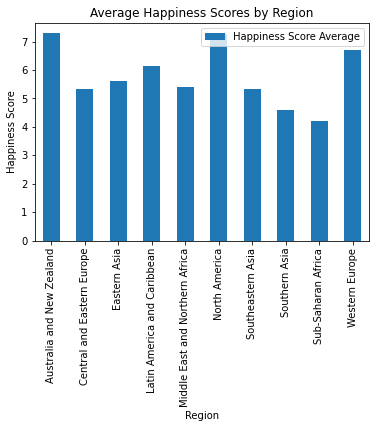

In [22]:
df2015_regions_avg_score.plot(kind="bar")
plt.title('Average Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

-We see the happiness scores for each region in the above graph for 2015,
let's see what's the situation for 2016,

In [23]:
std_df_2016 = df_2016[["Happiness Score","Region"]].groupby("Region").std()
std_df_2016 = std_df_2015.rename(columns={'Happiness Score': 'Happiness Score Standard Deviation'})
std_df_2016

,Happiness Score Standard Deviation
Region,
Australia and New Zealand,0.001414
Central and Eastern Europe,0.570446
Eastern Asia,0.554053
Latin America and Caribbean,0.728560
Middle East and Northern Africa,1.101382
North America,0.217789
Southeastern Asia,0.950020
Southern Asia,0.570526
Sub-Saharan Africa,0.609557


In [24]:
df2016_regions_avg_score = df_2016[["Happiness Score","Region"]].groupby("Region").mean("Happiness Score")
df2016_regions_avg_score = df2016_regions_avg_score.rename(columns={"Happiness Score" : "Happiness Score Average"})

Text(0, 0.5, 'Happiness Score')

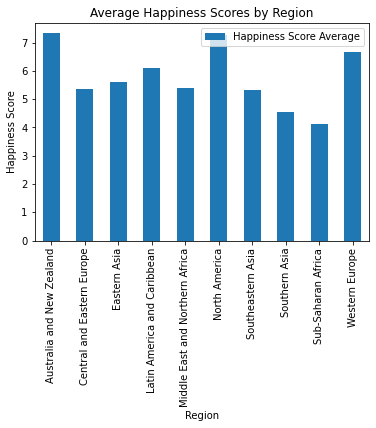

In [25]:
df2016_regions_avg_score.plot(kind="bar")
plt.title('Average Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

-For other years there won't be much difference for the average happiness score per region.

#### Which parameter affects happiness score the most for each year?
##### Let's look at the case for 2015,

In [27]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<AxesSubplot:>

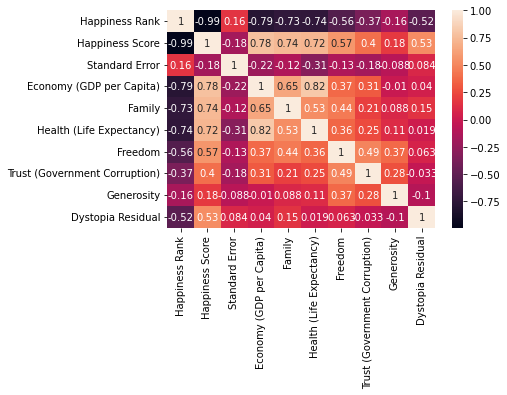

In [60]:
import seaborn as sb
corr = df_2015.drop(["Country", "Region",], axis=1).corr()
sb.heatmap(corr, annot=True)

#### Now,by the heatmap that is above,we can see that which values are highly correlated with "Happiness Score",
#### let's look at the case from a ML side,

In [61]:
X_train = df_2015.drop(["Happiness Score", "Country", "Region", "Happiness Rank"], axis=1)
y_train = df_2015["Happiness Score"]

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Standard Error                 158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


In [57]:
y_train.describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=1211), max_features=7)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
display(embeded_rf_feature)

4 selected features


['Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Dystopia Residual']

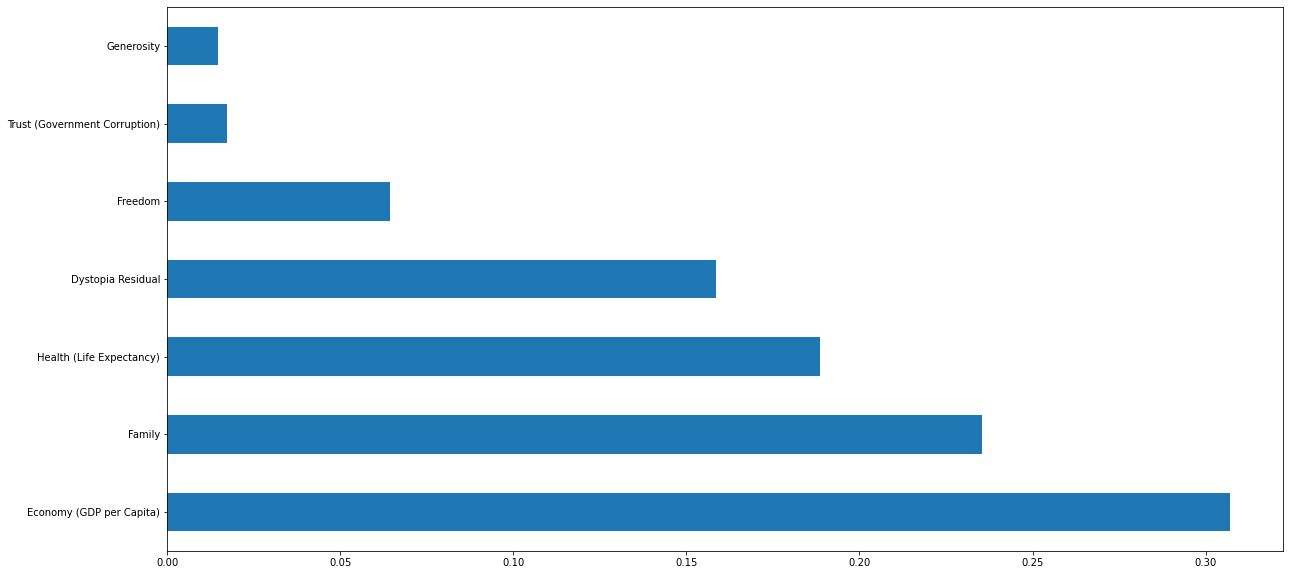

In [59]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
plt.figure(figsize=(20,10))

model = RandomForestRegressor(n_estimators=100, random_state=1211)
model.fit(X_train,y_train)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

#### Now we will look at the case for other years,

<AxesSubplot:>

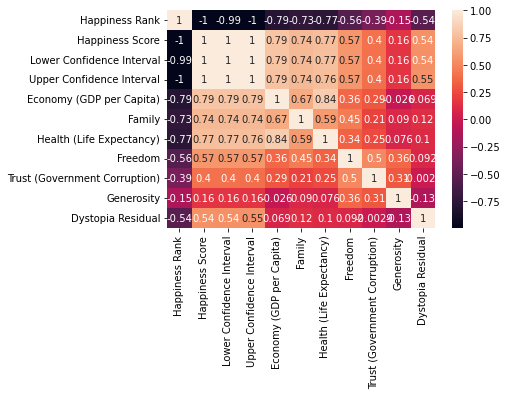

In [63]:
corr = df_2016.drop(["Country", "Region",], axis=1).corr()
sb.heatmap(corr, annot=True)

From the above graph we can see that the parameters that affect the happiness score from the most to least are;
Economy,Health,Family,Freedom,,,

<AxesSubplot:>

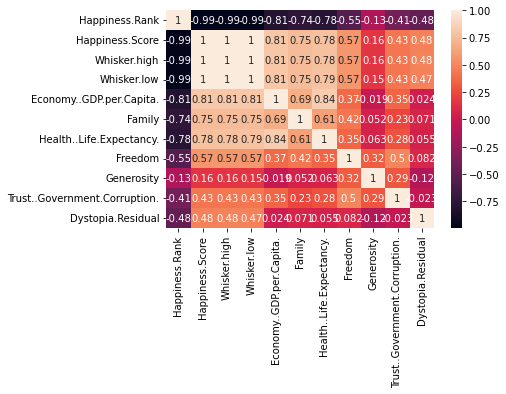

In [64]:
corr = df_2017.drop(["Country"], axis=1).corr()
sb.heatmap(corr, annot=True)

<AxesSubplot:>

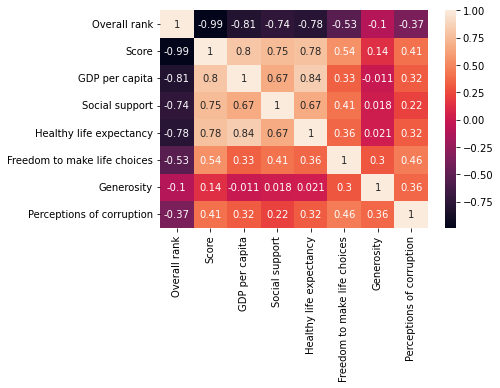

In [67]:
corr = df_2018.drop(["Country or region"], axis=1).corr()
sb.heatmap(corr, annot=True)

<AxesSubplot:>

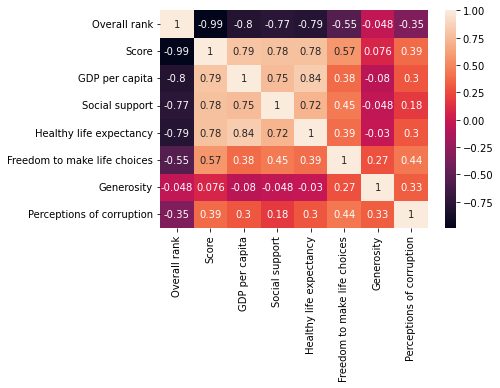

In [69]:
corr = df_2019.drop(["Country or region"], axis=1).corr()
sb.heatmap(corr, annot=True)

From above heatmaps we can see that,overall,the parameters that affect the happiness the most are,,,
Health,Family and Economy which is expected...